In [1]:
#Ignoring warnings
import warnings
warnings.filterwarnings("ignore")

#Math and Vectors
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#ML
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import r2_score

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [3]:
df = pd.read_csv("/kaggle/input/iris/Iris.csv")

# Data Exploration

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df = df.drop("Id", axis = 1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# EDA

In [7]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

array([[<Axes: title={'center': 'SepalLengthCm'}>,
        <Axes: title={'center': 'SepalWidthCm'}>],
       [<Axes: title={'center': 'PetalLengthCm'}>,
        <Axes: title={'center': 'PetalWidthCm'}>]], dtype=object)

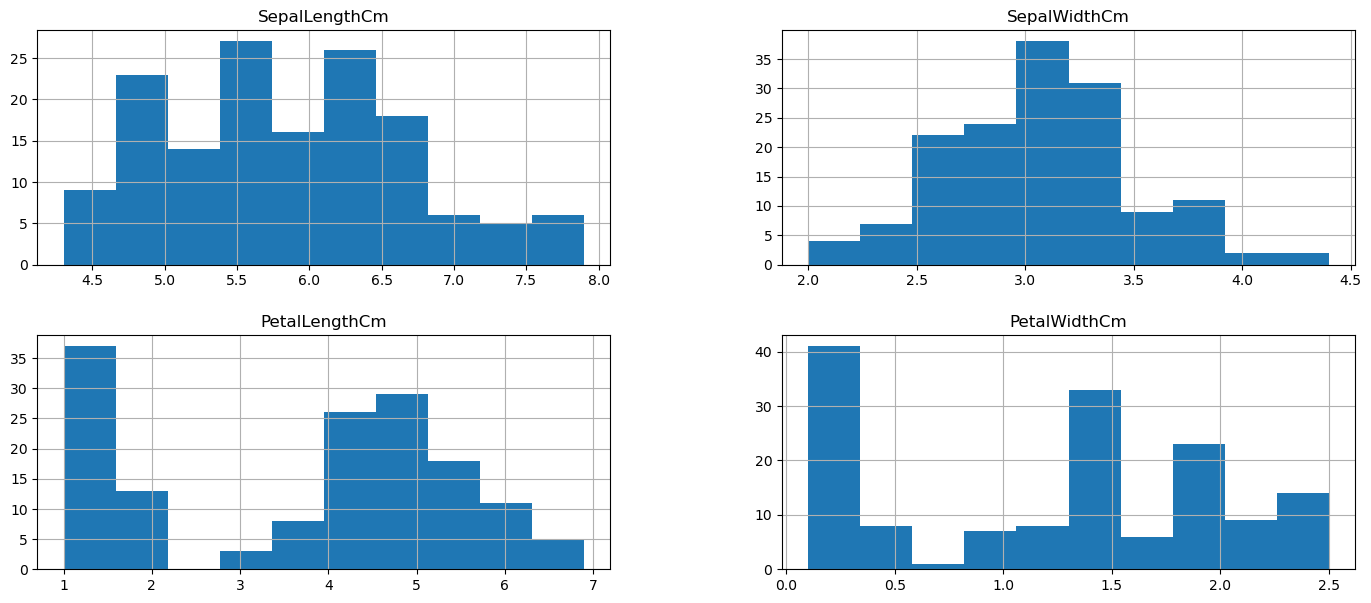

In [8]:
df.hist(figsize = (17, 7))

Text(0, 0.5, 'Centimeters')

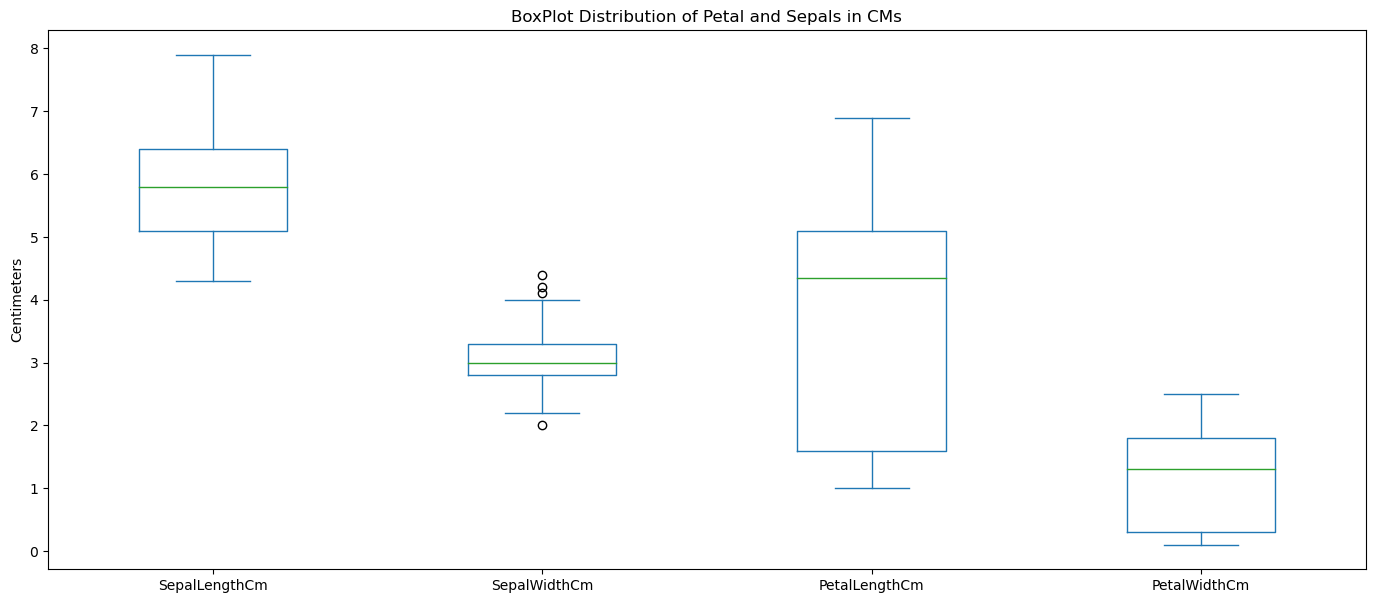

In [9]:
#Checking outliers
df.plot(kind = "box", figsize = (17, 7))
plt.title("BoxPlot Distribution of Petal and Sepals in CMs")
plt.ylabel("Centimeters")

In [10]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**It seems that the SepalWidthCm column has some outliers. We will remove them using a standard scale before we create our model.**

<Axes: >

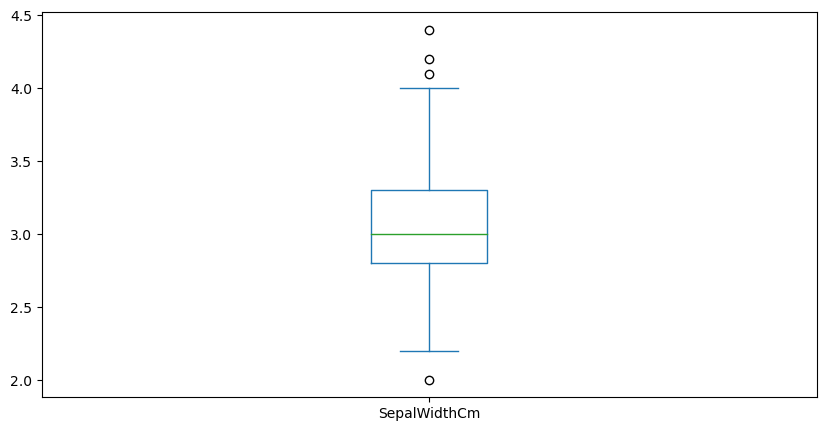

In [11]:
df["SepalWidthCm"].plot(kind = "box", figsize = (10, 5))

### The Distribution of Species Types VS Sepal Length and Width

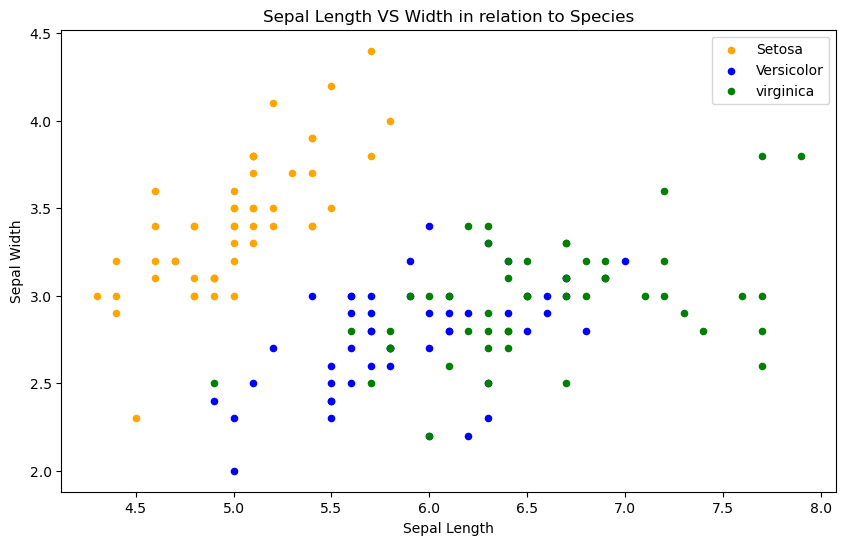

In [12]:
fig = df[df.Species == "Iris-setosa"].plot(kind = "scatter", x = "SepalLengthCm", y = "SepalWidthCm", color = "orange", label = "Setosa")
df[df.Species == "Iris-versicolor"].plot(kind = "scatter", x = "SepalLengthCm", y = "SepalWidthCm", color = "blue", label = "Versicolor", ax = fig)
df[df.Species == "Iris-virginica"].plot(kind = "scatter", x = "SepalLengthCm", y = "SepalWidthCm", color = "green", label = "virginica", ax = fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width in relation to Species")
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.show()

**We can see that both sepal width and length varies for all three species. Versicolor and Virginica sepal width are almost just alike. While Setosa sepal length are much shorter but they are broader. on average, Virginca has the longest sepal length.**

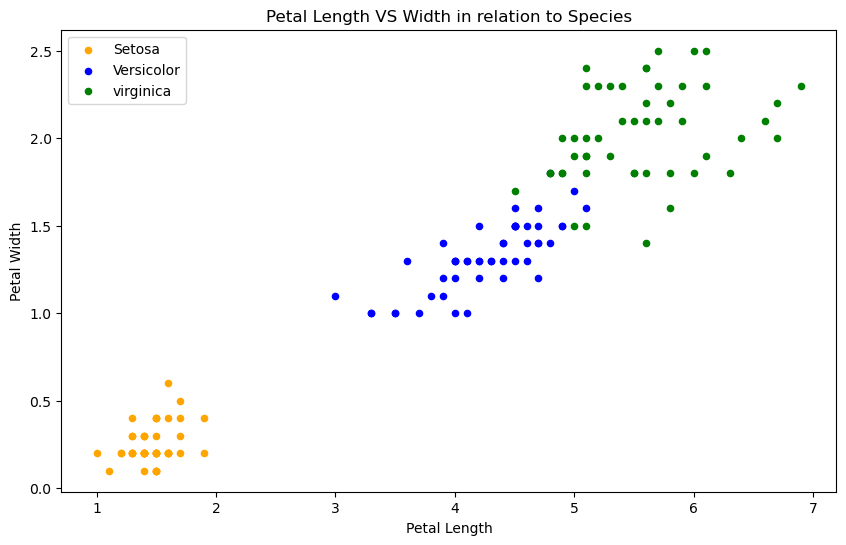

In [13]:
fig = df[df.Species == "Iris-setosa"].plot(kind = "scatter", x = "PetalLengthCm", y = "PetalWidthCm", color = "orange", label = "Setosa")
df[df.Species == "Iris-versicolor"].plot(kind = "scatter", x = "PetalLengthCm", y = "PetalWidthCm", color = "blue", label = "Versicolor", ax = fig)
df[df.Species == "Iris-virginica"].plot(kind = "scatter", x = "PetalLengthCm", y = "PetalWidthCm", color = "green", label = "virginica", ax = fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title("Petal Length VS Width in relation to Species")
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.show()

**Here we can see that distrbution of petal length and width for the three iris species. On Average, the Setosas have a much shorter lenth and width. Next in line is the Versicolor. And then the Virginicas have the longest length and width. We also see a clear positive line going up, as the length of the petal increases, so does the petal width.**

## Viewing Correlations

<Axes: >

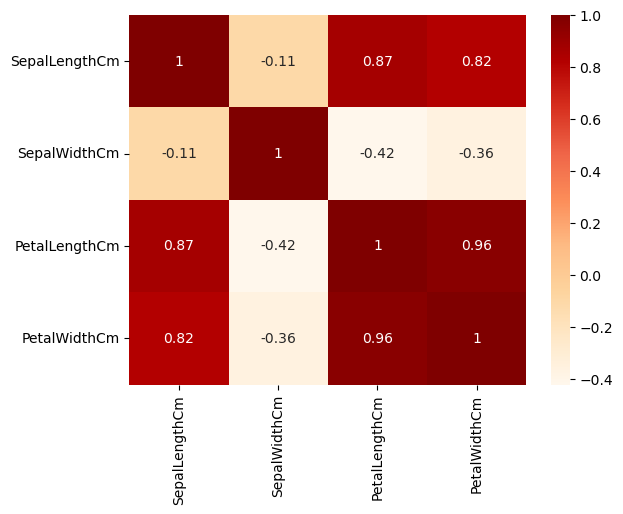

In [14]:
sns.heatmap(df.corr(), cmap = "OrRd", annot = True)

**Here we can see a higher correlation among PetalLength with all of the other variables. With this, Petal Length might be a better indicator on how big the blossoms will be this year. We try to predict the petal length for this study.
Let's use a regression plot visualize the relationships.**

<Axes: xlabel='SepalWidthCm', ylabel='SepalWidthCm'>

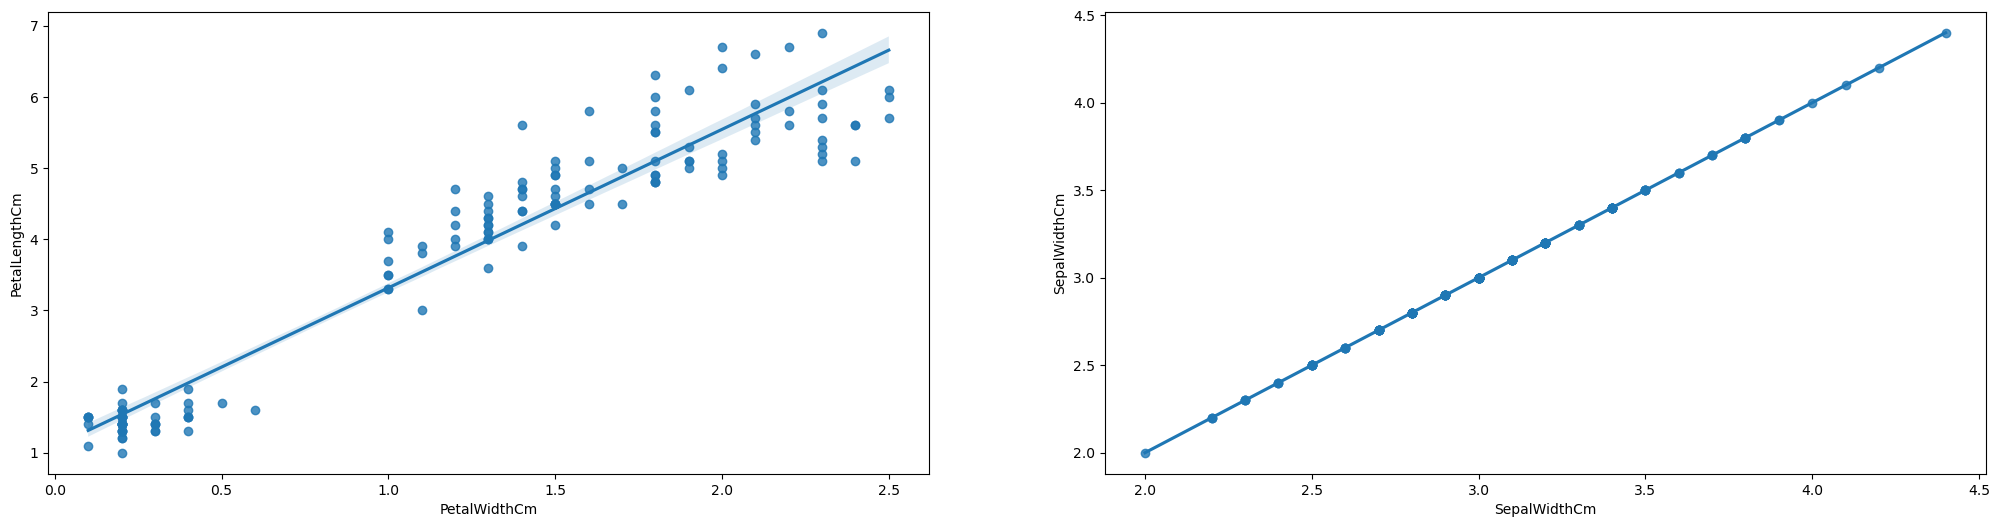

In [15]:
plt.figure(figsize = (25, 6))
plt.subplot(1, 2, 1)
sns.regplot(x = "PetalWidthCm", y = "PetalLengthCm", data = df)
plt.subplot(1, 2, 2)
sns.regplot(x = "SepalWidthCm", y = "SepalWidthCm", data = df)

**Here we can see that both Petal Width and Sepal Length have a strong positive relationship with Petal Length. As Petal Width and Sepal Width increases so does the Petal Length!**

<Axes: xlabel='SepalWidthCm', ylabel='PetalLengthCm'>

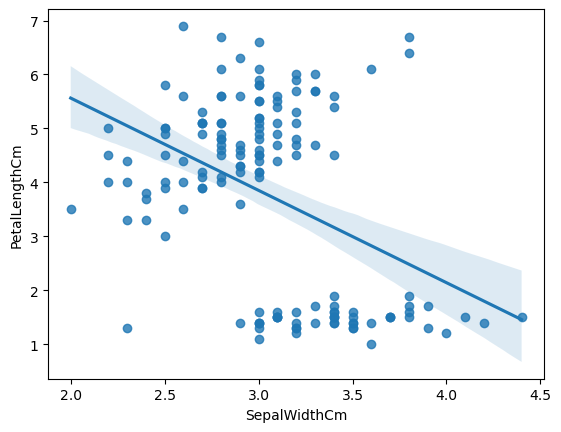

In [16]:
sns.regplot(x = "SepalWidthCm", y = "PetalLengthCm", data = df)

**Here we can see a strong negative relationship between Petal Length and Sepal Width. As Petal Length increases, the sepal width decreases! Let's take a look at the p-value.**

In [17]:
#p-value test
Petal_W_P = pearsonr(df["PetalWidthCm"], df["PetalLengthCm"])
Sepal_W_P = pearsonr(df["SepalWidthCm"], df["PetalLengthCm"])
Sepal_L_P = pearsonr(df["SepalLengthCm"], df["PetalLengthCm"])

In [18]:
p_value_t = pd.DataFrame({
    "PetalWidthCm": Petal_W_P,
    "SepalWidthCm": Sepal_W_P,
    "SepalLengthCm": Sepal_L_P
})
p_value_t

,PetalWidthCm,SepalWidthCm,SepalLengthCm
0,9.627571e-01,-4.205161e-01,8.717542e-01
1,5.776661e-86,8.429366e-08,1.038454e-47


**We can see that p-value scores are all below 0.05, so it can be concluded that the results(relationships) are statistically significant.**

## Machine Learning Model

In [19]:
#let's prepare the data for testing and training

#one hot coding 
species_2 = pd.get_dummies(df['Species'], drop_first=True)

X = pd.concat([species_2, df[['PetalWidthCm', 'SepalWidthCm', 'SepalLengthCm']]], axis=1)
y = df['PetalLengthCm']

In [20]:
X

,Iris-versicolor,Iris-virginica,PetalWidthCm,SepalWidthCm,SepalLengthCm
0,0,0,0.2,3.5,5.1
1,0,0,0.2,3.0,4.9
2,0,0,0.2,3.2,4.7
3,0,0,0.2,3.1,4.6
4,0,0,0.2,3.6,5.0
...,...,...,...,...,...
145,0,1,2.3,3.0,6.7
146,0,1,1.9,2.5,6.3
147,0,1,2.0,3.0,6.5
148,0,1,2.3,3.4,6.2


In [21]:
y

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: PetalLengthCm, Length: 150, dtype: float64

In [22]:
#Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [23]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(112, 5) (38, 5) (112,) (38,)


## Multilinear Regression

In [24]:
Input = [
    ("scaler", StandardScaler()),
    ("mode", LinearRegression())
]
pipe = Pipeline(Input)
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('mode', LinearRegression())])

In [25]:
y_pipe = pipe.predict(X_test)
ml_score = pipe.score(X_test, y_test)

## Polynomial Regression

In [26]:
Input = [
    ("scaler", StandardScaler()),
    ("polynomial", PolynomialFeatures(degree = 3, include_bias = False)),
    ("mode", LinearRegression())
]
pipe = Pipeline(Input)
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('polynomial',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('mode', LinearRegression())])

In [27]:
y_pipe = pipe.predict(X_test)
pm_score = pipe.score(X_test, y_test)

## Polynomaial with Ridge

In [28]:
#Polynomial
poly = PolynomialFeatures(degree = 3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

#Ridge
ridge = Ridge(alpha = 0.1) #Regularization
ridge.fit(X_train_poly, y_train) #Fitting the model to both the polynomial features and target variable

pm_r_score = ridge.score(X_test_poly, y_test)

## RandomForestRegressor

In [29]:
Input = [
    ("scaler", StandardScaler()),
    ("mode", RandomForestRegressor())
]
pipe = Pipeline(Input)
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('mode', RandomForestRegressor())])

In [30]:
rf_predictions = pipe.predict(X_test)
rf_score = pipe.score(X_test, y_test)

## DecisionTreeRegressor

In [31]:
Input = [
    ("scaler", StandardScaler()),
    ("mode", DecisionTreeRegressor())
]
pipe = Pipeline(Input)
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('mode', DecisionTreeRegressor())])

In [32]:
dtr_pipe = pipe.predict(X_test)
dtr_score = pipe.score(X_test, y_test)

## KNN

In [33]:
Input = [
    ("scaler", StandardScaler()),
    ("mode", KNeighborsRegressor(n_neighbors = 4))
]
pipe = Pipeline(Input)
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('mode', KNeighborsRegressor(n_neighbors=4))])

In [34]:
knn_pipe = pipe.predict(X_test)
knn_score = pipe.score(X_test, y_test)

# Model Evaluations

In [35]:
#We will be using the rsquared scores to evaluate how well our models were good at predicting the Petal Length.

r_scores = pd.DataFrame({
    "Multi_Linear": ml_score,
    "Polynomial": pm_score,
    "PolynomailRidge": pm_r_score,
    "RandomForest": rf_score,
    "DecisionTree": dtr_score,
    "KNeighbors": knn_score
}, index = ["Accuracy"])
r_scores.transpose()

,Accuracy
Multi_Linear,0.963401
Polynomial,0.964152
PolynomailRidge,0.970590
RandomForest,0.969667
DecisionTree,0.958380
KNeighbors,0.965790


In [36]:
submission_file = pd.DataFrame({
    "SepalLength": X_test["SepalLengthCm"],
    "SepalWidth": X_test["SepalWidthCm"],
    "PetalLengthCm": rf_predictions,
    "Species": species_2.columns[X_test.iloc[:, 0].values]
})

In [37]:
submission_file.to_csv("submission.csv")

In [38]:
submission_file

,SepalLength,SepalWidth,PetalLengthCm,Species
114,5.8,2.8,5.272000,Iris-versicolor
62,6.0,2.2,4.178000,Iris-virginica
33,5.5,4.2,1.489000,Iris-versicolor
107,7.3,2.9,5.992000,Iris-versicolor
7,5.0,3.4,1.450000,Iris-versicolor
100,6.3,3.3,5.522000,Iris-versicolor
40,5.0,3.5,1.410000,Iris-versicolor
86,6.7,3.1,4.732000,Iris-virginica
76,6.8,2.8,4.584000,Iris-virginica
71,6.1,2.8,4.435333,Iris-virginica
